In [1]:
#Code for the pipeline was significantly inspired on:
# /rayidghani/magicloops/blob/master/magicloops.py
# /hectorsalvador/ML_for_Public_Policy

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import pylab as pl
pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

# import pipline files:
import read
import explore
import clean
import features
import classify
import evaluate

#Global Variable:
DEP_VAR ='SeriousDlqin2yrs'
explore.DEP_VAR ='SeriousDlqin2yrs'
explore.LEAD_VAR = 2

In [2]:
df = read.read("credit-data.csv")
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
d = explore.explore(df)
summary = d["summary"]
fts = d["features"]

In [4]:
fts

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [5]:
# Summary statistics for the whole dataset
summary

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
explore.plots(df)

Check the current folder for default histograms of these features.


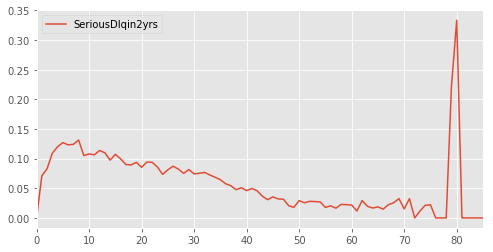

In [7]:
age_graph = explore.explore_var(df,'age','line')["graph"]

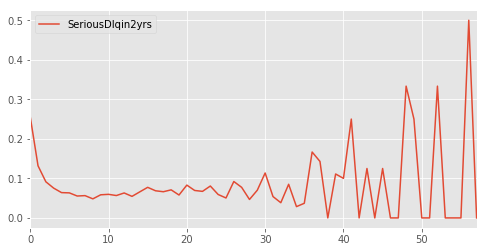

In [8]:
loan_graph = explore.explore_var(df,'NumberOfOpenCreditLinesAndLoans','line')["graph"]

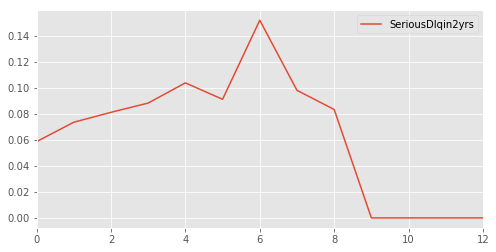

In [9]:
dependent_graph = explore.explore_var(df,'NumberOfDependents','line')["graph"]

In [10]:
#check the null value
clean.check_missing_data(df)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
PersonID,150000,0


In [11]:
#Check null values again after filling in missing values
df = clean.clean(df,'NumberOfDependents','zero')
df = clean.clean(df,'MonthlyIncome','mean')
clean.check_missing_data(df)

value,False
variable,
DebtRatio,150000
MonthlyIncome,150000
NumberOfDependents,150000
NumberOfOpenCreditLinesAndLoans,150000
NumberOfTime30-59DaysPastDueNotWorse,150000
NumberOfTime60-89DaysPastDueNotWorse,150000
NumberOfTimes90DaysLate,150000
NumberRealEstateLoansOrLines,150000
PersonID,150000


Generate categorical bin boundary for selected variables

In [12]:
features.binning(df, 'MonthlyIncome', 'quantiles', [0, 0.25, 0.5, 0.75, 1])
fts.append(df.keys()[-1])

In [13]:
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bins_MonthlyIncome
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413,1.497340
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021,1.117032
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,3.000000


In [14]:
sel_fts = ['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [18]:
grid_size = 'small'
classifiers, grid = classify.define_clfs_params(grid_size)
models=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
metrics = ['precision', 'recall', 'f1', 'auc']

In [ ]:
all_models = classify.classify(df[sel_fts], df[DEP_VAR], models, 3, 0.05, metrics,classifiers, grid)
#the number printing below is the time cost for each model

RF
0.77987408638
0.681610822678
0.636565923691
3.84939813614
3.82702112198
3.62642598152
0.670195102692
0.650848150253
0.697146177292
3.74888801575
3.52840399742
3.76528215408
0.737691879272
0.756421804428
0.764577150345
4.45533490181
4.43684697151
4.76539683342
0.7815721035
0.657479047775
0.760020017624
4.58343315125
4.67042303085
4.5877931118
1.16774201393
1.2339618206
1.15686583519
9.2142701149
9.21880722046
9.33572483063
1.1410779953
1.10914492607
1.13861918449
8.88863492012
8.98830986023
9.09971690178
1.48945498466
1.43107509613
1.48634696007
11.9586238861
11.7395951748
14.3756320477
1.44858407974
1.51810002327
1.47410917282
11.8968520164
11.5648560524
11.4720160961
Finished running RF
DT
0.0559160709381
0.0445959568024
0.0276739597321
0.029816865921
0.0526161193848
0.0298202037811
0.0434210300446
0.0583999156952
0.0441451072693
0.0294120311737
0.0608940124512
0.0358870029449
0.0477838516235
0.0309660434723
0.052925825119
0.0343980789185
0.0494899749756
0.0491631031036
0.115716934

In [24]:
with open('all_models.json') as json_data:
    all_models = json.load(json_data)
    print(all_models)

{u'KNN': {u"{'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'auto'}": {u'f1': 0.2517392896374954, u'auc': 0.7022730575805082, u'time': 7.5727763175964355, u'precision': 0.15482490710505573, u'recall': 0.6730298580518846}, u"{'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'ball_tree'}": {u'f1': 0.24103191789850298, u'auc': 0.6827429337806743, u'time': 74.49186325073242, u'precision': 0.1492189321520168, u'recall': 0.6265296133137542}, u"{'n_neighbors': 100, 'weights': 'uniform', 'algorithm': 'ball_tree'}": {u'f1': 0.23861753333859384, u'auc': 0.7069721925064595, u'time': 104.4858747323354, u'precision': 0.14223894637817497, u'recall': 0.7400881057268722}, u"{'n_neighbors': 50, 'weights': 'uniform', 'algorithm': 'auto'}": {u'f1': 0.24499531476275663, u'auc': 0.7042423341866996, u'time': 7.546476443608602, u'precision': 0.14830858085808582, u'recall': 0.7038668624571708}, u"{'n_neighbors': 100, 'weights': 'distance', 'algorithm': 'kd_tree'}": {u'f1': 0.2590635141400093, u'

In [26]:
table_auc, best_models_auc, winner_auc = classify.select_best_models(all_models, models, 'auc')
table_prec, best_models_prec, winner_prec = classify.select_best_models(all_models, models, 'precision')
table_rec, best_models_rec, winner_rec = classify.select_best_models(all_models, models, 'recall')
table_f1, best_models_f1, winner_f1 = classify.select_best_models(all_models, models, 'f1')

In [27]:
table_auc

,auc,f1,precision,recall,time,parameters
RF,0.278872,0.76194,0.76996,0.167969,0.821504,"{'max_features': 'log2', 'min_samples_split': ..."
DT,0.277875,0.754454,0.119007,0.168426,0.799152,"{'max_features': 'log2', 'min_samples_split': ..."
KNN,0.259064,0.710537,9.99015,0.159803,0.683798,"{'n_neighbors': 100, 'weights': 'distance', 'a..."
ET,0.280001,0.74483,6.07153,0.171824,0.755915,"{'max_features': 'sqrt', 'min_samples_split': ..."
AB,0.377014,0.654297,0.118041,0.417609,0.343612,"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"
GB,0.30174,0.772684,20.8895,0.185814,0.802252,"{'n_estimators': 100, 'subsample': 1.0, 'learn..."
LR,0.136212,0.536573,2.57946,0.0752159,0.720509,"{'penalty': 'l1', 'C': 1}"
NB,0.0759494,0.518413,0.0584777,0.350806,0.0425844,{}


In [28]:
table_prec

,auc,f1,precision,recall,time,parameters
RF,0.284931,0.755054,11.664,0.174291,0.780225,"{'max_features': 'log2', 'min_samples_split': ..."
DT,0.377014,0.654297,0.048637,0.417609,0.343612,"{'max_features': 'log2', 'min_samples_split': ..."
KNN,0.232258,0.585416,2.57068,0.245633,0.220264,"{'n_neighbors': 1, 'weights': 'uniform', 'algo..."
ET,0.289694,0.712008,0.886959,0.189267,0.61723,"{'max_features': 'log2', 'min_samples_split': ..."
AB,0.377014,0.654297,0.118041,0.417609,0.343612,"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"
GB,0.354703,0.640238,2075.12,0.407964,0.313754,"{'n_estimators': 100, 'subsample': 0.5, 'learn..."
LR,0.136212,0.536573,2.57946,0.0752159,0.720509,"{'penalty': 'l1', 'C': 1}"
NB,0.0759494,0.518413,0.0584777,0.350806,0.0425844,{}


In [29]:
table_rec

,auc,f1,precision,recall,time,parameters
RF,0.273486,0.759072,4.70586,0.163862,0.826236,"{'max_features': 'log2', 'min_samples_split': ..."
DT,0.127516,0.5,0.0374269,0.0681,1,"{'max_features': 'sqrt', 'min_samples_split': ..."
KNN,0.238618,0.706972,104.486,0.142239,0.740088,"{'n_neighbors': 100, 'weights': 'uniform', 'al..."
ET,0.127524,0.500036,1.70907,0.0681045,1,"{'max_features': 'sqrt', 'min_samples_split': ..."
AB,0.127516,0.5,96.1193,0.0681,1,"{'n_estimators': 1000, 'algorithm': 'SAMME.R'}"
GB,0.127516,0.5,1.22423,0.0681,1,"{'n_estimators': 10, 'subsample': 0.1, 'learni..."
LR,0.126974,0.500799,0.149757,0.0682108,0.916789,"{'penalty': 'l1', 'C': 1e-05}"
NB,0.0759494,0.518413,0.0584777,0.350806,0.0425844,{}


In [30]:
table_f1

,auc,f1,precision,recall,time,parameters
RF,0.284931,0.755054,11.664,0.174291,0.780225,"{'max_features': 'log2', 'min_samples_split': ..."
DT,0.377014,0.654297,0.048637,0.417609,0.343612,"{'max_features': 'log2', 'min_samples_split': ..."
KNN,0.271928,0.67837,3.67715,0.182925,0.529613,"{'n_neighbors': 5, 'weights': 'distance', 'alg..."
ET,0.291437,0.724221,6.63032,0.187273,0.656714,"{'max_features': 'sqrt', 'min_samples_split': ..."
AB,0.377014,0.654297,0.118041,0.417609,0.343612,"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"
GB,0.354703,0.640238,2075.12,0.407964,0.313754,"{'n_estimators': 100, 'subsample': 0.5, 'learn..."
LR,0.136212,0.536573,2.57946,0.0752159,0.720509,"{'penalty': 'l1', 'C': 1}"
NB,0.0759494,0.518413,0.0584777,0.350806,0.0425844,{}


In [31]:
best_models_auc

{u'AB': {'metrics': {u'auc': 0.6542971356735855,
   u'f1': 0.377013963480129,
   u'precision': 0.4176085663295657,
   u'recall': 0.3436123348017621,
   u'time': 0.1180409590403239},
  'parameters': u"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"},
 u'DT': {'metrics': {u'auc': 0.7544541122877836,
   u'f1': 0.2778751790441663,
   u'precision': 0.16842617916665584,
   u'recall': 0.7991515744819709,
   u'time': 0.11900703112284343},
  'parameters': u"{'max_features': 'log2', 'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 5}"},
 u'ET': {'metrics': {u'auc': 0.7448301882246934,
   u'f1': 0.2800006920264007,
   u'precision': 0.1718238412373433,
   u'recall': 0.7559145048131833,
   u'time': 6.0715320110321045},
  'parameters': u"{'max_features': 'sqrt', 'min_samples_split': 10, 'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100}"},
 u'GB': {'metrics': {u'auc': 0.7726844986455758,
   u'f1': 0.30173974466930503,
   u'precision': 0.18581362006062804,
   u'recall': 0.80225159079

In [32]:
best_models_prec

{u'AB': {'metrics': {u'auc': 0.6542971356735855,
   u'f1': 0.377013963480129,
   u'precision': 0.4176085663295657,
   u'recall': 0.3436123348017621,
   u'time': 0.1180409590403239},
  'parameters': u"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"},
 u'DT': {'metrics': {u'auc': 0.6542971356735855,
   u'f1': 0.377013963480129,
   u'precision': 0.4176085663295657,
   u'recall': 0.3436123348017621,
   u'time': 0.04863699277242025},
  'parameters': u"{'max_features': 'log2', 'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 1}"},
 u'ET': {'metrics': {u'auc': 0.7120080885702539,
   u'f1': 0.2896943410177128,
   u'precision': 0.1892665544234923,
   u'recall': 0.6172295643661282,
   u'time': 0.8869589964548746},
  'parameters': u"{'max_features': 'log2', 'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10}"},
 u'GB': {'metrics': {u'auc': 0.6402384940119652,
   u'f1': 0.3547031504881209,
   u'precision': 0.407964196263168,
   u'recall': 0.3137542829172785,


In [33]:
best_models_rec

{u'AB': {'metrics': {u'auc': 0.5,
   u'f1': 0.12751615017320475,
   u'precision': 0.0681,
   u'recall': 1.0,
   u'time': 96.11926698684692},
  'parameters': u"{'n_estimators': 1000, 'algorithm': 'SAMME.R'}"},
 u'DT': {'metrics': {u'auc': 0.5,
   u'f1': 0.12751615017320475,
   u'precision': 0.0681,
   u'recall': 1.0,
   u'time': 0.03742694854736328},
  'parameters': u"{'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'gini', 'max_depth': 1}"},
 u'ET': {'metrics': {u'auc': 0.5000357692170119,
   u'f1': 0.12752410973440279,
   u'precision': 0.06810454030268684,
   u'recall': 1.0,
   u'time': 1.7090657552083333},
  'parameters': u"{'max_features': 'sqrt', 'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}"},
 u'GB': {'metrics': {u'auc': 0.5,
   u'f1': 0.12751615017320475,
   u'precision': 0.0681,
   u'recall': 1.0,
   u'time': 1.2242276668548584},
  'parameters': u"{'n_estimators': 10, 'subsample': 0.1, 'learning_rate': 0.001, 'max_depth': 5}"},


In [34]:
best_models_f1

{u'AB': {'metrics': {u'auc': 0.6542971356735855,
   u'f1': 0.377013963480129,
   u'precision': 0.4176085663295657,
   u'recall': 0.3436123348017621,
   u'time': 0.1180409590403239},
  'parameters': u"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"},
 u'DT': {'metrics': {u'auc': 0.6542971356735855,
   u'f1': 0.377013963480129,
   u'precision': 0.4176085663295657,
   u'recall': 0.3436123348017621,
   u'time': 0.04863699277242025},
  'parameters': u"{'max_features': 'log2', 'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 1}"},
 u'ET': {'metrics': {u'auc': 0.7242208775587837,
   u'f1': 0.29143654209261255,
   u'precision': 0.18727308993996475,
   u'recall': 0.6567139827051721,
   u'time': 6.6303244431813555},
  'parameters': u"{'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100}"},
 u'GB': {'metrics': {u'auc': 0.6402384940119652,
   u'f1': 0.3547031504881209,
   u'precision': 0.407964196263168,
   u'recall': 0.313754282917

In [35]:
winner_auc

((u'GB',
  u"{'n_estimators': 100, 'subsample': 0.1, 'learning_rate': 0.5, 'max_depth': 50}"),
 0.7726844986455758)

In [36]:
winner_prec

((u'AB', u"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"), 0.4176085663295657)

In [37]:
winner_rec

((u'AB', u"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"), 1.0)

In [38]:
winner_f1

((u'AB', u"{'n_estimators': 1, 'algorithm': 'SAMME.R'}"), 0.377013963480129)

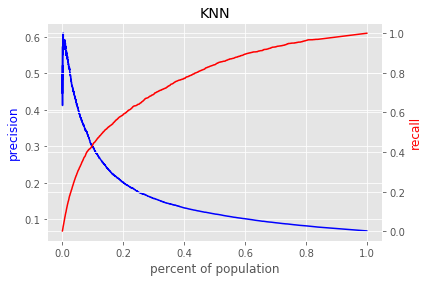

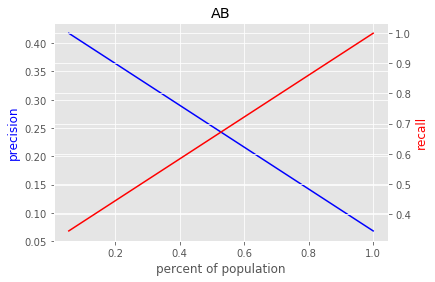

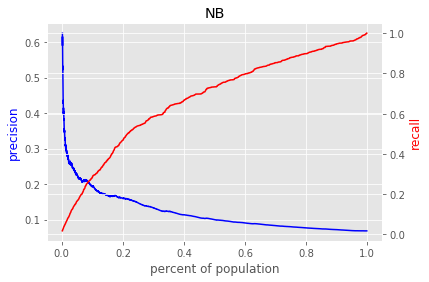

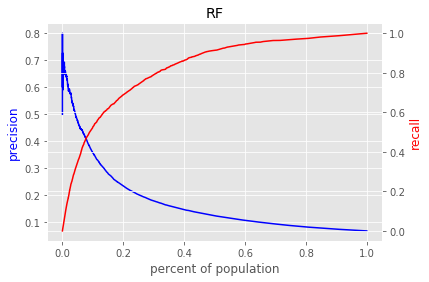

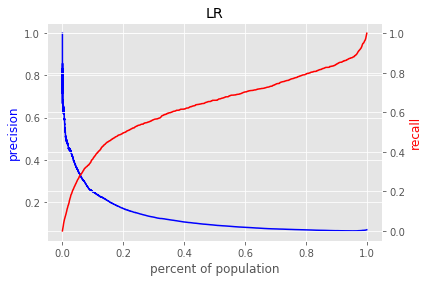

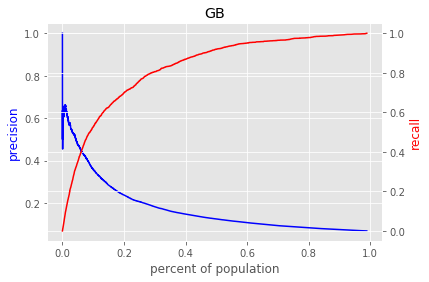

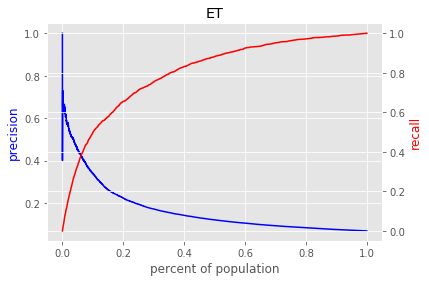

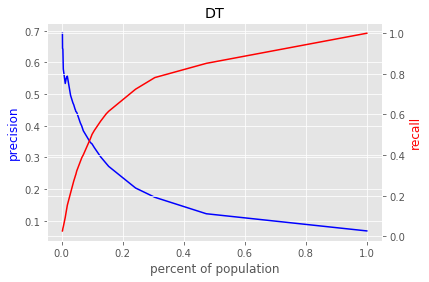

In [39]:
classify.gen_precision_recall_plots(df[sel_fts], df[DEP_VAR], best_models_auc,classifiers)